# Task 
Perform Exploratory Data Analysis on a Kaggle dataset. Investigate and treat nulls, review possible correlations and visualise the data. 

# Part 1: Data Structure

### Q. Import pandas

In [1]:
import pandas as pd

### Q. Read in the data

In [2]:
# Read in first dataset
df = pd.read_csv('datasets/worldhappiness2019.csv')
df.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


### Q. Show dataframe schema & structure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


### Q. Review and comment on structure

The dataframe has a total of 9 columns and 156 rows. There are no null values. Most of the column values are floats except for the first row which is an integer and the second row which is a string. 

### Q. Use descriptive statistics to check data for initial quality and sense

In [4]:
df.describe(include = "all")

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
unique,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ivory Coast,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,78.500000,NaN,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,NaN,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,NaN,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,NaN,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,NaN,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,NaN,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250


The Overall rank column is a list of integers from 1 to 156 ranking the countries by happiness score. Therefore, the data values described are accurate.

In the rest of the numerical columns the mean values are similiar to the median values suggesting the distribution of each column would look like the normal distribution. There doesn't seem to be any extreme values (either minimum or maximum) in any column. 

In the country or region column we see what we'd expect. There are 156 unique entries and the frequency is 1 because each country has a unique row in the dataframe.

In [5]:
# Retrieving the country with highest happiness score
df.loc[0, :]

Overall rank                          1
Country or region               Finland
Score                             7.769
GDP per capita                     1.34
Social support                    1.587
Healthy life expectancy           0.986
Freedom to make life choices      0.596
Generosity                        0.153
Perceptions of corruption         0.393
Name: 0, dtype: object

In [6]:
# Sorting by GDP to find the countries which have highest and lowest GDP per capita
df["GDP per capita"].sort_values()

111    0.000
154    0.026
144    0.046
140    0.073
126    0.094
       ...  
50     1.500
20     1.503
33     1.572
13     1.609
28     1.684
Name: GDP per capita, Length: 156, dtype: float64

In [7]:
# Locating country with highest GDP per capita
df.loc[28, "Country or region"]

'Qatar'

In [8]:
# Locating country with lowest GDP per capita
df.loc[111, "Country or region"]

'Somalia'

### Q. Report specifically on missing data

In [9]:
df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

The data has no null values.

# Part 2: Data Cleansing

### Q. Drop rows that have null values

The dataset doesn't have any null values. 

# Part 3: Exploratory Data Analysis

### Q. Review possible correlatons

In [10]:
df.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


### Q. Interpret and characterise correlations

GDP per capita, Social Support and Healthy life expectancy have a strong positive correlation with happiness score because they are close to 1. Generosity has almost no correlation with happiness score because it's close to 0. 

There is negative correlation between Overall rank and Score because the countries are ranked by score where country 1 has the highest Score. 

The highest positive correlation overall seems to be between GDP per capita and Healthy life expectancy. 

### Q. Perform analysis using `groupby`

I will try to join two csv files, worldhappiness2015 and worldhappiness2019. Worldhappiness2015 has regions as well as countries which I plan to join so I can groupby region. 

In [11]:
# reading in the second dataset
tdf = pd.read_csv('datasets/worldhappiness2015.csv')
tdf.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [12]:
# joining the two dataframes based on their country columns
merged = df.merge(tdf, left_on='Country or region', right_on='Country', how='outer')
merged.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity_x,Perceptions of corruption,Country,...,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity_y,Dystopia Residual
0,1.0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Finland,...,6.0,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
1,2.0,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Denmark,...,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
2,3.0,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Norway,...,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531


# Part 4: Data Cleansing Part 2

### Q. Drop any rows that contain null values

In [13]:
# Checking for null values in the merged dataframe
merged.isna().sum()

Overall rank                     9
Country or region                9
Score                            9
GDP per capita                   9
Social support                   9
Healthy life expectancy          9
Freedom to make life choices     9
Generosity_x                     9
Perceptions of corruption        9
Country                          7
Region                           7
Happiness Rank                   7
Happiness Score                  7
Standard Error                   7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity_y                     7
Dystopia Residual                7
dtype: int64

In [14]:
# Create a new dataframe dropping the nulls from the merged dataframe. Double check no nulls remain.
dropped = merged.dropna(axis=0)
dropped.isna().any()

Overall rank                     False
Country or region                False
Score                            False
GDP per capita                   False
Social support                   False
Healthy life expectancy          False
Freedom to make life choices     False
Generosity_x                     False
Perceptions of corruption        False
Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity_y                     False
Dystopia Residual                False
dtype: bool


# Part 5: Exploratory Data Analysis Part 2

Score from the 2019 dataset and Happiness Score from 2015 should have high correlation because it's unlikely happiness would have changed dramatically in a few years.

In [15]:
# Checking correlation between Score in 2019 and Happiness Score in 2015
dropped['Score'].corr(dropped['Happiness Score'])

0.899172803655591

In [16]:
# Locating the countries in the top 10 for happiness score in 2019
dropped.loc[0:9, "Country or region"]

0        Finland
1        Denmark
2         Norway
3        Iceland
4    Netherlands
5    Switzerland
6         Sweden
7    New Zealand
8         Canada
9        Austria
Name: Country or region, dtype: object

In [17]:
# Locating the countries in the top 10 for happiness score in 2015
dropped2 = dropped.sort_values(by="Happiness Rank")
dropped2.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity_x,Perceptions of corruption,Country,...,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity_y,Dystopia Residual
5,6.0,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Switzerland,...,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
3,4.0,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Iceland,...,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,2.0,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Denmark,...,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
2,3.0,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Norway,...,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
8,9.0,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,Canada,...,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
0,1.0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Finland,...,6.0,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
4,5.0,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,...,7.0,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
6,7.0,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Sweden,...,8.0,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
7,8.0,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,New Zealand,...,9.0,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
10,11.0,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290,Australia,...,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Most of the countries who were happiest in 2015 stay in the top 10 in 2019. The only exceptions are Australia who appear in the 2015 list but not the 2019 one and Austria who appear in the 2019 list but not the 2015 one.

In [18]:
# Group by Region to calculate mean happiness score in 2019 and find the happiest region
dft = dropped.groupby('Region')['Score'].mean()
dft.sort_values(ascending = False)

Region
Australia and New Zealand          7.267500
North America                      7.085000
Western Europe                     6.898400
Latin America and Caribbean        5.942550
Eastern Asia                       5.688833
Central and Eastern Europe         5.571786
Southeastern Asia                  5.273667
Middle East and Northern Africa    5.237000
Southern Asia                      4.526857
Sub-Saharan Africa                 4.314611
Name: Score, dtype: float64

In [19]:
# Group by Region to calculate mean happiness score in 2015 and find the happiest region
dft2 = dropped.groupby('Region')['Happiness Score'].mean()
dft2.sort_values(ascending = False)

Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.739350
Latin America and Caribbean        6.137300
Eastern Asia                       5.626167
Central and Eastern Europe         5.344571
Middle East and Northern Africa    5.330789
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.169528
Name: Happiness Score, dtype: float64

Most regions have a similiar ranking except Middle East and Northern Africa which was happier in 2015. 


# Part 6: Data Visualization

### Q. Use seaborn library to create some visualizations

In [20]:
import seaborn as sns

C:\Users\44784\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


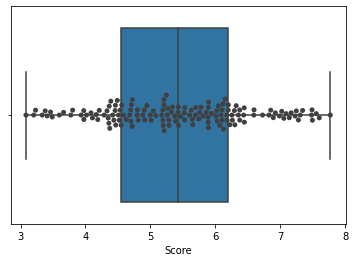

In [21]:
# Create a box plot to visualize the spread of 2019 happiness scores. Use a swarm plot to show the values on top. 
box = sns.boxplot(dropped['Score'])
box = sns.swarmplot(data =dropped, x="Score", color=".25")


<AxesSubplot:title={'center':'Happiness in 2019 by GDP per capita'}, xlabel='GDP per capita', ylabel='Happiness Score in 2019'>

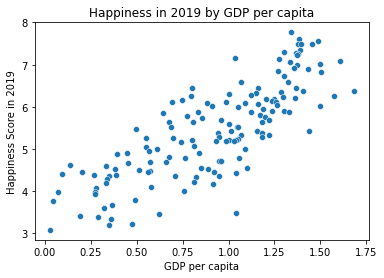

In [22]:
# Visualizing the correlation between Score in 2019 and GDP per capita (this was high positive correlation)
bx = sns.scatterplot(data=dropped, x='GDP per capita', y='Score')
bx.set(xlabel='GDP per capita', ylabel='Happiness Score in 2019', title = 'Happiness in 2019 by GDP per capita')
bx

<AxesSubplot:title={'center':'Happiness in 2019 by Generosity'}, xlabel='Generosity', ylabel='Happiness Score in 2019'>

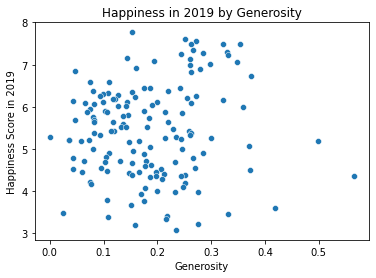

In [23]:
# Visualizing the correlation between Score in 2019 and Generosity (this was not correlated)
cx = sns.scatterplot(data=dropped, x='Generosity_x', y='Score')
cx.set(xlabel='Generosity', ylabel='Happiness Score in 2019', title = 'Happiness in 2019 by Generosity')
cx

<AxesSubplot:xlabel='GDP per capita', ylabel='Healthy life expectancy'>

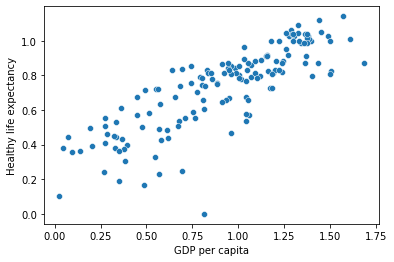

In [24]:
# Visualizing the correlation between GDP per capita and healthy life expectancy (this was highly correlated)
dx = sns.scatterplot(data=dropped, x='GDP per capita', y='Healthy life expectancy')
dx.set(xlabel='GDP per capita', ylabel='Healthy life expectancy')
dx

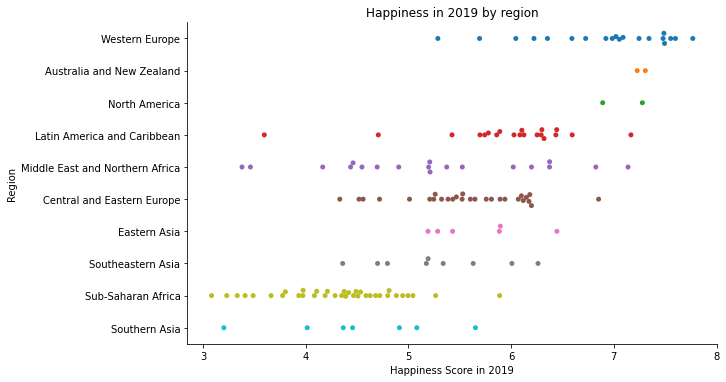

In [25]:
# Comparing 2019 happiness score by region
box = sns.catplot(x="Score", y="Region", data=dropped, kind = "swarm", aspect = 2)
box.set(xlabel='Happiness Score in 2019', ylabel='Region', title = 'Happiness in 2019 by region')

[Text(0.5, 0, 'Happiness Score in 2019'),
 Text(0, 0.5, 'Region'),
 Text(0.5, 1.0, 'Mean happiness in 2019 by region')]

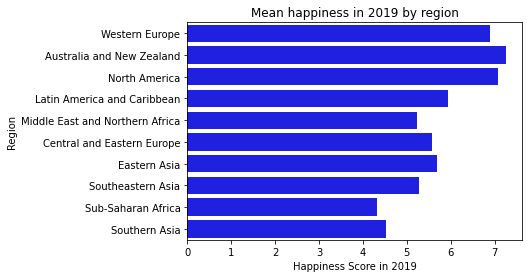

In [26]:
# Using barplot to visualize mean happiness score in 2019 by region
bar = sns.barplot(data=dropped, x='Score', y='Region', ci = None, color = 'blue');
bar.set(xlabel='Happiness Score in 2019', ylabel='Region', title = 'Mean happiness in 2019 by region')

<AxesSubplot:title={'center':'Happiness in 2015 and 2019 by country'}, xlabel='Happiness Score in 2015', ylabel='Happiness Score in 2019'>

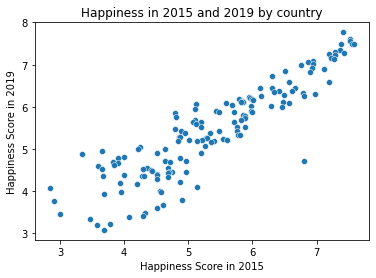

In [27]:
# Visualizing the 2015 happiness score compared to 2019
ax = sns.scatterplot(data=dropped, x='Happiness Score', y='Score')
ax.set(xlabel='Happiness Score in 2015', ylabel='Happiness Score in 2019', title = 'Happiness in 2015 and 2019 by country')
ax